### Maxwell A. Fine 14880725
### Assingment 1: Stastical Methods in Astrophysics

In [20]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import scipy.stats as sps
from scipy.stats import ttest_ind
from scipy.stats import kstest # not sure if we are supposed to do the 1 or 2 sample version


# Set a seed for reproducibility
random_seed = 42


### Reconmened pre-assingment data processing as given in A1 handout

In [3]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

clcounts = stars.groupby(['Name']).size().reset_index(name='count')

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


ColDefs(
    name = 'Name'; format = 'A20'; start = 1
    name = 'ID'; format = 'I4'; disp = 'I4'; start = 22
    name = 'GaiaDR3'; format = 'I19'; disp = 'I19'; start = 27
    name = 'inrt'; format = 'I1'; disp = 'I1'; start = 47
    name = 'Prob'; format = 'F10.8'; disp = 'F10.8'; start = 49
    name = 'RAdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 60
    name = 'e_RAdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 73
    name = 'DEdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 84
    name = 'e_DEdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 97
    name = 'GLON'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 108
    name = 'GLAT'; format = 'E11.4'; unit = 'deg'; disp = 'E11.4'; start = 121
    name = 'pmRA'; format = 'E11.4'; unit = 'mas/yr'; disp = 'E11.4'; start = 133
    name = 'e_pmRA'; format = 'F10.8'; unit = 'mas/yr'; disp = 'F10.8'; start = 145
    name = 'pmDE'; format = 'E11.4'; unit = 'mas/yr'; d

### Task 1:

The parameter Prob gives a conservative estimate of the probability that the star is associated with
the cluster, by doing a ‘clustering’3 analysis of the stars in the 5-dimensional astrometric parameter
space, i.e. using RAdeg, DEdeg, Plx, pmRA and pmDE. Use the Pandas sample function on your
cluster star counts dataframe, to randomly select 4 clusters, only from clusters with >1000 candidate
stars. Split each cluster into two subsamples corresponding to stars with Prob ≤ 0.8 and stars with
Prob > 0.8 and for each cluster, make a scatter plot matrix (see the extras episode) to show on the
same figure the data points for both subsamples on this 5-D parameter space. Note that it is fine to 


### Idea & Assumptions 

* Assumed data is normally distrubuted for each parameter / variable

* We can use the pandas sample function to randomly select 4 clusters, from clusters with >1000 stars which we can simply slice for. 
    - The col name we are looking for is 'name' this represents the cluster names
        * this is what the starter code does!
    - then slice 
    - then randomly pick

* Next we can slice again to split the clusters into Prob ≤ 0.8 and stars with
Prob > 0.8 and for each cluster.

* First time using Pandas so I a assuming we can slice easily

* No idea what a scatter plot matrix is so, we will have to look at the extras episode before attemptng to plot

* To test my code if it works as expected, we will be using a pre-determined seed for pd.sample



### Task 1: coding cell below

In [4]:
# Lets inspect stars to see what it looks like
stars

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
0,1636-283,0,6032349260227596544,0,0.747692,249.708525,0.201080,-28.585117,0.115789,351.679705,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1,1636-283,0,6032358331198284160,1,1.000000,249.866424,0.020684,-28.402037,0.013691,351.914287,...,8.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
2,1636-283,0,6032358331198285696,1,0.843798,249.865221,0.046356,-28.399406,0.029595,351.915643,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
3,1636-283,0,6032358331198286080,1,1.000000,249.861159,0.045101,-28.400698,0.030237,351.912273,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
4,1636-283,0,6032358670488486784,1,1.000000,249.939480,0.038724,-28.429366,0.023344,351.935370,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291924,vdBergh_92,7163,3045840104515988992,1,1.000000,106.116546,0.110176,-11.474387,0.111851,224.621323,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291925,vdBergh_92,7163,3045840074455065088,1,0.838193,106.136236,0.049847,-11.471452,0.049169,224.627544,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291926,vdBergh_92,7163,3045840074453671680,1,0.639341,106.135606,0.056229,-11.468653,0.058581,224.624770,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,VARIABLE,0,0
1291927,vdBergh_92,7163,3045840654267074048,1,0.738133,106.159649,0.058318,-11.436082,0.062037,224.606570,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0


In [5]:
# task 1 code

# Filter names with more than 1000 entries
clusters_over_1000 = clcounts[clcounts['count'] > 1000]

# Randomly pick 4 names with more than 1000 entries
randomly_picked_clusters = clusters_over_1000.sample(n=4, random_state=random_seed)

# print for user
print('Randomly Picked Clusters\n', randomly_picked_clusters, '\n')

# for loop to split each cluster by Prob ≤ 0.8
df_high = []
df_low = []

for index, cluster in randomly_picked_clusters.iterrows():

    # Create an empty DataFrame with desired columns
    result_high_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    result_low_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    # sort and slice data
    cluster_name= cluster['Name']
    clustter_data = stars[stars['Name'] == cluster_name]
    higher_8_prob = clustter_data[clustter_data['Prob'] > 0.8]
    lower_8_prob = clustter_data[clustter_data['Prob'] <= 0.8]

    # Add to DataFrames
    # Replace append with concat
    result_high_df = pd.concat([result_high_df, pd.DataFrame({
        'Name': [cluster_name],
        'Higher_8_Prob': [higher_8_prob.shape[0]],
        'Lower_8_Prob': [lower_8_prob.shape[0]],
        'RAdeg': [higher_8_prob['RAdeg'].tolist()],
        'DEdeg': [higher_8_prob['DEdeg'].tolist()],
        'Plx': [higher_8_prob['Plx'].tolist()],
        'pmRA': [higher_8_prob['pmRA'].tolist()],
        'pmDE': [higher_8_prob['pmDE'].tolist()],
    })], ignore_index=True)

    result_low_df = pd.concat([result_low_df, pd.DataFrame({
        'Name': [cluster_name],
        'Higher_8_Prob': [higher_8_prob.shape[0]],
        'Lower_8_Prob': [lower_8_prob.shape[0]],
        'RAdeg': [lower_8_prob['RAdeg'].tolist()],
        'DEdeg': [lower_8_prob['DEdeg'].tolist()],
        'Plx': [lower_8_prob['Plx'].tolist()],
        'pmRA': [lower_8_prob['pmRA'].tolist()],
        'pmDE': [lower_8_prob['pmDE'].tolist()],
    })], ignore_index=True)


    df_high.append(result_high_df)
    df_low.append(result_low_df)



Randomly Picked Clusters
                Name  count
4746       NGC_6475   1427
1327  Collinder_261   3071
4565       NGC_2506   2465
4553       NGC_2447   1043 



### Task 1: plotting cell below

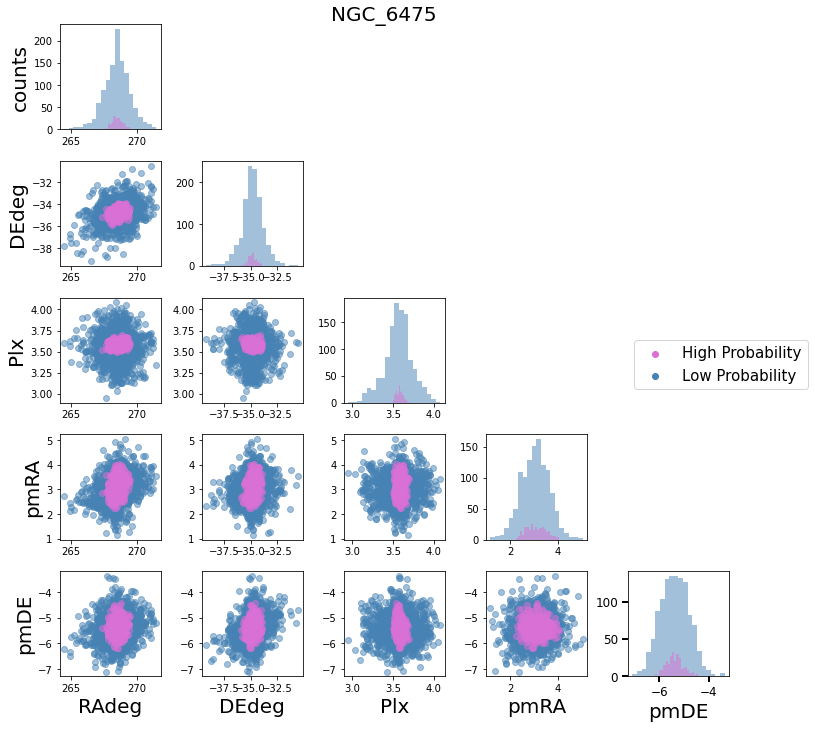

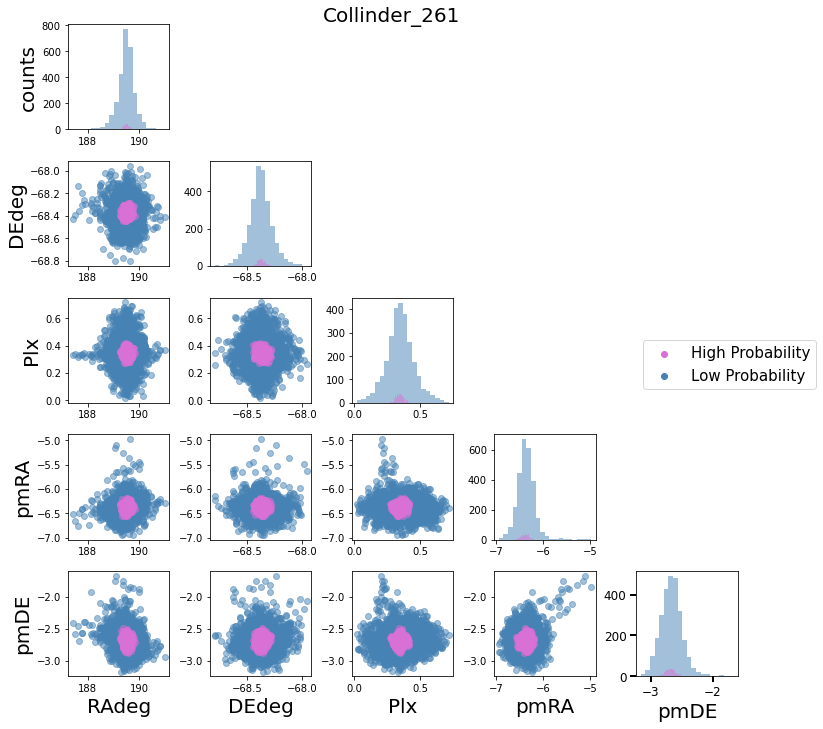

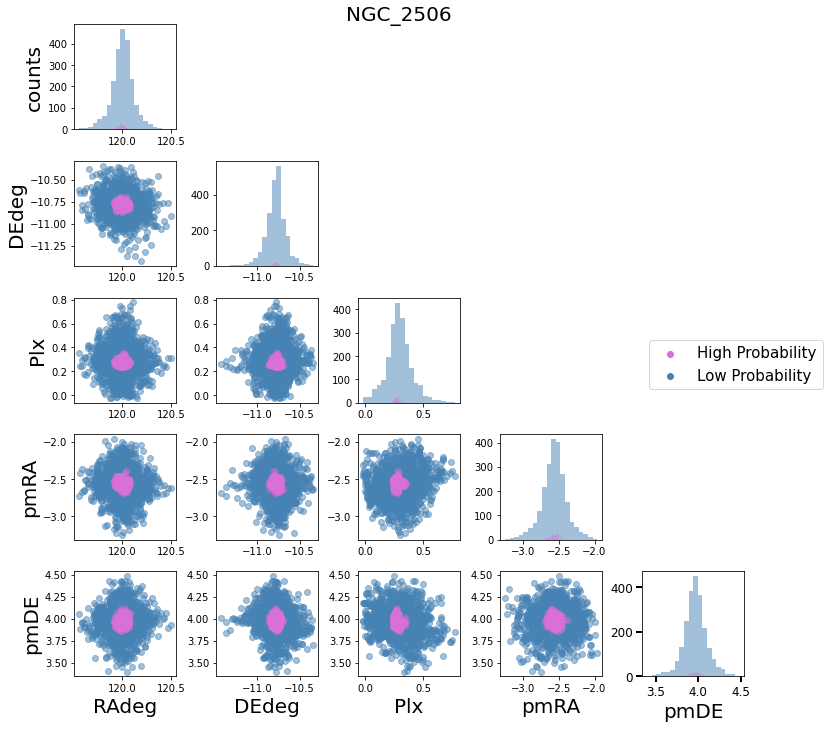

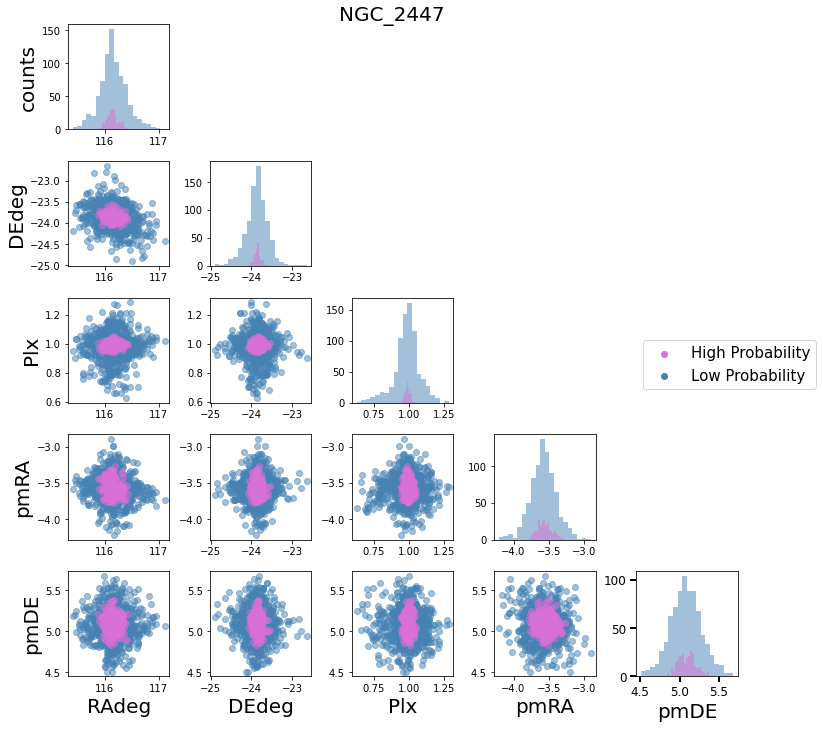

In [26]:

# Define labels and colors
ndims = len(['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE'])
labels = ['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']
color_high = 'orchid'
color_low = 'steelblue'

# Nested for loop for plotting
for k in range(len(df_low)):
    fig, axes = plt.subplots(ndims, ndims, figsize=(12, 12))
    fig.subplots_adjust(wspace=0.4, hspace=0.3)
    plotting_df = df_low[k] 
    for i in range(ndims):  # y dimension of the grid
        for j in range(ndims):  # x dimension of the grid
            if i == j:
                
                axes[i, j].hist(plotting_df[labels[i]].values, bins=20, color=color_low, alpha=0.5)
            elif i > j:
        
                axes[i, j].scatter(plotting_df[labels[j]].values[0], plotting_df[labels[i]].values[0], color=color_low, alpha=0.5,)
            else:
                axes[i, j].axis('off')

            if j == 0:
                if i == j:
                    axes[i, j].set_ylabel('counts', fontsize=20)
                else:
                    axes[i, j].set_ylabel(labels[i], fontsize=20)

            if i == ndims - 1:
                axes[i, j].set_xlabel(labels[j], fontsize=20)

    plotting_df = df_high[k]
    for i in range(ndims):  # y dimension of the grid
        for j in range(ndims):  # x dimension of the grid
            if i == j:
                
                axes[i, j].hist(plotting_df[labels[i]].values, bins=20, color=color_high, alpha=0.5)
            elif i > j:
                axes[i, j].scatter(plotting_df[labels[j]].values[0], plotting_df[labels[i]].values[0], color=color_high, alpha=0.5, )
            else:
                axes[i, j].axis('off')

            if j == 0:
                if i == j:
                    axes[i, j].set_ylabel('counts', fontsize=20)
                else:
                    axes[i, j].set_ylabel(labels[i], fontsize=20)

            if i == ndims - 1:
                axes[i, j].set_xlabel(labels[j], fontsize=20)

    # inspired by john to do a dummy plot for the legend
    plt.scatter([],[], label='High Probability', color=color_high)
    plt.scatter([],[], label='Low Probability', color=color_low)
    plt.tick_params(axis='both', which='major', labelsize=12, width=2, length=6)

    fig.legend(loc=7, fontsize=15)

    plt.suptitle(plotting_df['Name'][0], size=20, y=0.9)
    #plt.savefig('max_1.1_wip.png')
    plt.show()


### Explain: what is the likely reason for the differences between the distributions of points shown by each subsample?

### Task 2:

An interesting question is whether there is any spatial (RA and Dec) variation of the other astrometric
and photometric parameters in each cluster Now:

### A
a. Select a cluster from your sample (your choice but you can randomly select from the clusters
if you wish) and split it into 2 subsamples in RA, corresponding to stars with RA: i) greater
than the mean RA, ii) less than the mean RA. Do the same for Dec, to create 2 subsamples
selected on Dec. Then for the RA-selected subsamples, plot a figure with 5 separate subplots
(e.g. side-by-side) which show the histograms of the following parameters for each of the 2
subsamples: Plx, pmRA, pmDE, Gmag and BP-RP. I.e. each subplot will show two
histograms, one for each subsample, so you can compare the distributions for stars on one
side of the cluster vs the other. Repeat this for the 2 subsamples selected on Dec.

### B
b. Use t-tests to compare the 2 subsamples in RA and then the 2 subsamples in Dec for the
following parameters: Plx, pmRA, pmDE, Gmag and BP-RP. For the t-test you can assume
populations with the same variance.
I.e. you will do 5 t-tests for the subsamples selected on RA and 5 for the subsamples selected
on Dec, to see if there is any evidence that the populations of stars which each subsample is
drawn from is different from the other subsample, i.e. does it change with position in the
cluster?

### C
c. Comment on the implications of your test results, and repeat the same procedure for two
other clusters. Based on the parameter distributions, is the t-test an appropriate test in all
cases?

### Task 2: Starter Code

In [7]:
parmeters = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']

############################################################
# Modification

# Cut out high variance clusters
clusters_hiprob = clusters_hiprob[clusters_hiprob['sd_RAdeg'] < 0.1] # 0.1 is in degree
clusters_hiprob = clusters_hiprob[clusters_hiprob['sd_DEdeg'] < 0.1] # 0.1 is in degree

# Cut out clusters with low stars
clusters_hiprob = clusters_hiprob[clusters_hiprob['count']>200]


clusters_hiprob['RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['DEdeg'] = clusters_sd_hiprob['DEdeg']
clusters_hiprob[parmeters] = clusters_sd_hiprob[parmeters]
############################################################

Index(['Name', 'count', 'sd_RAdeg', 'sd_DEdeg', 'RAdeg', 'DEdeg', 'Plx',
       'pmRA', 'pmDE', 'Gmag', 'BP-RP'],
      dtype='object')



               Name  count  sd_RAdeg  sd_DEdeg     RAdeg     DEdeg       Plx  \
217     Berkeley_36    217  0.040135  0.048875  0.040135  0.048875  0.065872   
219     Berkeley_39    211  0.029860  0.034516  0.029860  0.034516  0.038289   
221     Berkeley_43    205  0.053164  0.051358  0.053164  0.051358  0.070833   
1315  Collinder_110    275  0.079560  0.076032  0.079560  0.076032  0.024309   
1381     Czernik_41    205  0.062116  0.059241  0.062116  0.059241  0.043435   
...             ...    ...       ...       ...       ...       ...       ...   
6059    Trumpler_25    245  0.045522  0.038393  0.045522  0.038393  0.029005   
6070     Trumpler_5    605  0.059707  0.056944  0.059707  0.056944  0.040353   
6091       UBC_1020    210  0.079440  0.083825  0.079440  0.083825  0.050265   
6124        UBC_106    245  0.060764  0.058970  0.060764  0.0

### 2A:

Idea & Assumptions: 
* Assumed data is normally distrubuted for each parameter / variable
* we use pandas to sort the data into the 2 subgroups for each RA, DEC and then plot
* plotting seams like a hassel, and my current method is not ideal

            Name    ID              GaiaDR3  inrt      Prob       RAdeg  \
612436  NGC_5897  4672  6252664211869332352     1  1.000000  229.352613   
612438  NGC_5897  4672  6252664207571932544     1  0.825717  229.348643   
612441  NGC_5897  4672  6252664211869390848     1  0.921084  229.354074   
612453  NGC_5897  4672  6252664177512004480     1  1.000000  229.331823   
612454  NGC_5897  4672  6252664177511720832     1  0.856831  229.349442   
...          ...   ...                  ...   ...       ...         ...   
614757  NGC_5897  4672  6252666548331120000     1  0.904727  229.349013   
614759  NGC_5897  4672  6252666548331126912     1  1.000000  229.346836   
614767  NGC_5897  4672  6252666548331213312     1  0.856831  229.345557   
614770  NGC_5897  4672  6252666548331233152     1  0.856831  229.349413   
614772  NGC_5897  4672  6252666548333588096     1  1.000000  229.351060   

         e_RAdeg      DEdeg   e_DEdeg        GLON  ...  o_RVd   GRVSmag  \
612436  0.036745 -21.023

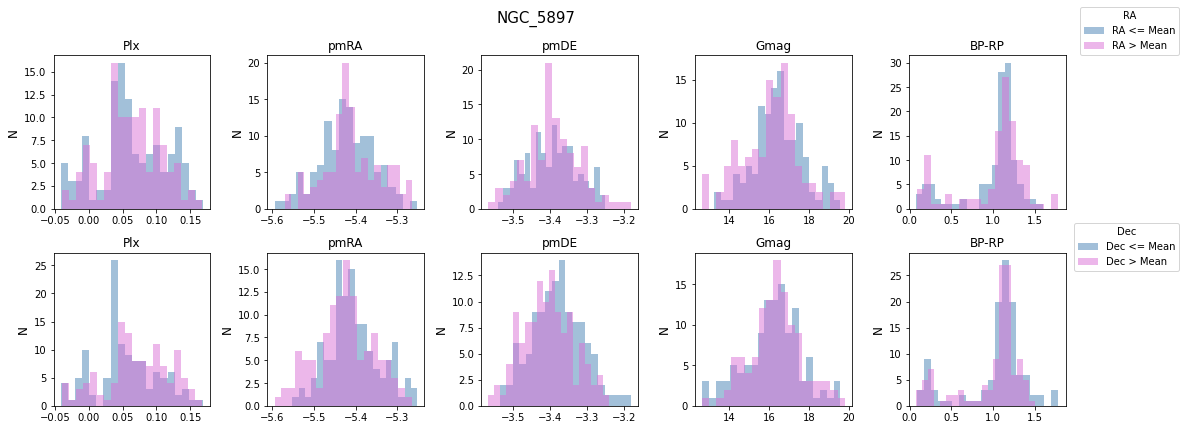

In [8]:
# Choose a random cluster from your sample with a seed for reproducibility
# Get unique cluster names
unique_cluster_names = clusters_hiprob['Name'].unique()
random_cluster_name = np.random.choice(unique_cluster_names)
selected_cluster = stars_hiprob[stars_hiprob['Name'] == random_cluster_name]

#selected_cluster = clusters_hiprob[clusters_hiprob['Name'] == 'ASCC_100']
#parmeters = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']

#print(selected_cluster.keys())
#print(selected_cluster['Name'])
print(selected_cluster)

# Calculate mean RA and Dec
mean_RA = selected_cluster['RAdeg'].mean()
mean_Dec = selected_cluster['DEdeg'].mean()


# Split into subsamples based on RA and Dec
ra_subsample_greater = selected_cluster[selected_cluster['RAdeg'] > mean_RA][parmeters]
ra_subsample_less = selected_cluster[selected_cluster['RAdeg'] <= mean_RA][parmeters]

dec_subsample_greater = selected_cluster[selected_cluster['DEdeg'] > mean_Dec][parmeters]
dec_subsample_less = selected_cluster[selected_cluster['DEdeg'] <= mean_Dec][parmeters]


# Plotting
# There is most certaintly a better way to plot this, but this is what I have at the moment
# I'll turn it into a loop if I have more time
# Function to plot histograms
def plot_histogram(ax, data1, data2, label1, label2, xlabel):
    '''
    Plot histograms for two datasets on the same axes.

    Parameters:
    - ax (Axes): The Matplotlib Axes object on which to plot the histograms.
    - data1 (array-like): Data for the first histogram.
    - data2 (array-like): Data for the second histogram.
    - label1 (str): Label for the first dataset.
    - label2 (str): Label for the second dataset.
    - xlabel (str): Label for the x-axis.

    Returns:
    - None: This function does not return any values; it directly plots the histograms on the given Axes.

    Notes:
    - The histograms are plotted with 20 bins, alpha=0.5, and labeled with the provided labels.
    - The color_low and color_high variables are assumed to be globally defined.

    '''
    # 20 bins, as thats the number used in the handout plotting code
    ax.hist(data2, bins=20, alpha=0.5, label=label2, color=color_low) 
    ax.hist(data1, bins=20, alpha=0.5, label=label1, color=color_high)
    ax.set_ylabel('N', size=12)
    ax.set_title(xlabel, size=12)

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Plot histograms for RA-selected subsamples
plot_histogram(axes[0, 0], ra_subsample_greater['Plx'], ra_subsample_less['Plx'], 'RA > Mean', 'RA <= Mean', 'Plx')
plot_histogram(axes[0, 1], ra_subsample_greater['pmRA'], ra_subsample_less['pmRA'], 'RA > Mean', 'RA <= Mean', 'pmRA')
plot_histogram(axes[0, 2], ra_subsample_greater['pmDE'], ra_subsample_less['pmDE'], 'RA > Mean', 'RA <= Mean', 'pmDE')
plot_histogram(axes[0, 3], ra_subsample_greater['Gmag'], ra_subsample_less['Gmag'], 'RA > Mean', 'RA <= Mean', 'Gmag')
plot_histogram(axes[0, 4], ra_subsample_greater['BP-RP'], ra_subsample_less['BP-RP'], 'RA > Mean', 'RA <= Mean', 'BP-RP')

# Add legend for RA at the upper right corner
handles_ra, labels_ra = axes[0, 0].get_legend_handles_labels()
fig.legend(handles_ra, labels_ra, loc='upper right', bbox_to_anchor=(1.1, 1), title='RA')

# Plot histograms for Dec-selected subsamples
plot_histogram(axes[1, 0], dec_subsample_greater['Plx'], dec_subsample_less['Plx'], 'Dec > Mean', 'Dec <= Mean', 'Plx')
plot_histogram(axes[1, 1], dec_subsample_greater['pmRA'], dec_subsample_less['pmRA'], 'Dec > Mean', 'Dec <= Mean', 'pmRA')
plot_histogram(axes[1, 2], dec_subsample_greater['pmDE'], dec_subsample_less['pmDE'], 'Dec > Mean', 'Dec <= Mean', 'pmDE')
plot_histogram(axes[1, 3], dec_subsample_greater['Gmag'], dec_subsample_less['Gmag'], 'Dec > Mean', 'Dec <= Mean', 'Gmag')
plot_histogram(axes[1, 4], dec_subsample_greater['BP-RP'], dec_subsample_less['BP-RP'], 'Dec > Mean', 'Dec <= Mean', 'BP-RP')

# Add legend for Dec at the upper right corner
handles_dec, labels_dec = axes[1, 0].get_legend_handles_labels()
fig.legend(handles_dec, labels_dec, loc='upper right', bbox_to_anchor=(1.1, 0.5), title='Dec')


# Adjust layout
plt.suptitle(random_cluster_name, size=15)
plt.tight_layout()
plt.show()



### 2.B

Idea:
* scipy.stats.ttest_ind is a canned method of the t-test! I can use this instead of coding one by hand
* Assumed data is normally distrubuted for each parameter / variable
* Assumed equal variance 

In [9]:
# Define a function for t-tests
def perform_t_tests(subsample1, subsample2, parameters):
    results = {}
    for param in parameters:
        stat, p_value = ttest_ind(subsample1[param], subsample2[param], equal_var=True)
        results[param] = {'statistic': stat, 'p-value': p_value}
    return results

# List of variables to perform t-tests on
parameters = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']

# Perform t-tests for RA-selected subsamples
t_test_results_ra = perform_t_tests(ra_subsample_greater, ra_subsample_less, parameters)

# Perform t-tests for Dec-selected subsamples
t_test_results_dec = perform_t_tests(dec_subsample_greater, dec_subsample_less, parameters)

# Display results
print("T-Tests for RA subsamples:")
for param, result in t_test_results_ra.items():
    print(f"{param}: t-stat = {result['statistic']}, p-value = {result['p-value']}")

print("\nT-Tests for Dec subsamples:")
for param, result in t_test_results_dec.items():
    print(f"{param}: t-stat = {result['statistic']}, p-value = {result['p-value']}")


T-Tests for RA subsamples:
Plx: t-stat = -0.1577264120602427, p-value = 0.8748101721928391
pmRA: t-stat = 1.617601408878611, p-value = 0.10711318389289541
pmDE: t-stat = 0.12265182290811365, p-value = 0.9024894557532506
Gmag: t-stat = -2.375458281658285, p-value = 0.01834443356540823
BP-RP: t-stat = 0.4749712647646535, p-value = 0.6352562104874198

T-Tests for Dec subsamples:
Plx: t-stat = 2.9212410651821896, p-value = 0.0038320400508406877
pmRA: t-stat = -2.5789008269724962, p-value = 0.010531868210095859
pmDE: t-stat = -2.9138663312502144, p-value = 0.003920393545228944
Gmag: t-stat = 0.8634080592914488, p-value = 0.3888087176466628
BP-RP: t-stat = -1.0564616293369549, p-value = 0.2918609662749153


### Comment on 2B:


### 2C:

Idea & Assumptions:
* Idea: 
    - we can copy & paste the code for 2B and make a function around it
    - one function call per random cluster
    - two calls then for 2 more random clusters ( we hope it doesn't pick one already chosen)
* Same assumptions as 2B: 
    - assumed data is normally distrubuted 
    - assumed variance is equal 
    - 

In [10]:
### 2C:

# Choose a random cluster from your sample with a seed for reproducibility
# Get unique cluster names

def do_2b(cluster_name, plotting = True, print_output=True):
    '''wrapper function around all the code needed to execute 2b, 
    if ran twice, does all the needed code for 2c'''

    # There is a small logical error here
    # I have no code to prevent a cluster from being picked more than once
    # I am relying on luck that it will not happen

    selected_cluster = stars_hiprob[stars_hiprob['Name'] == cluster_name]

    # Calculate mean RA and Dec
    mean_RA = selected_cluster['RAdeg'].mean()
    mean_Dec = selected_cluster['DEdeg'].mean()


    # Split into subsamples based on RA and Dec
    ra_subsample_greater = selected_cluster[selected_cluster['RAdeg'] > mean_RA][parmeters]
    ra_subsample_less = selected_cluster[selected_cluster['RAdeg'] <= mean_RA][parmeters]

    dec_subsample_greater = selected_cluster[selected_cluster['DEdeg'] > mean_Dec][parmeters]
    dec_subsample_less = selected_cluster[selected_cluster['DEdeg'] <= mean_Dec][parmeters]


    # Plotting
    if plotting == True:
        # There is most certaintly a better way to plot this, but this is what I have at the moment
        # I'll turn it into a loop if I have more time

        # Create subplots
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))

        # Plot histograms for RA-selected subsamples
        plot_histogram(axes[0, 0], ra_subsample_greater['Plx'], ra_subsample_less['Plx'], 'RA > Mean', 'RA <= Mean', 'Plx')
        plot_histogram(axes[0, 1], ra_subsample_greater['pmRA'], ra_subsample_less['pmRA'], 'RA > Mean', 'RA <= Mean', 'pmRA')
        plot_histogram(axes[0, 2], ra_subsample_greater['pmDE'], ra_subsample_less['pmDE'], 'RA > Mean', 'RA <= Mean', 'pmDE')
        plot_histogram(axes[0, 3], ra_subsample_greater['Gmag'], ra_subsample_less['Gmag'], 'RA > Mean', 'RA <= Mean', 'Gmag')
        plot_histogram(axes[0, 4], ra_subsample_greater['BP-RP'], ra_subsample_less['BP-RP'], 'RA > Mean', 'RA <= Mean', 'BP-RP')

        # Add legend for RA at the upper right corner
        handles_ra, labels_ra = axes[0, 0].get_legend_handles_labels()
        fig.legend(handles_ra, labels_ra, loc='upper right', bbox_to_anchor=(1.1, 1), title='RA')

        # Plot histograms for Dec-selected subsamples
        plot_histogram(axes[1, 0], dec_subsample_greater['Plx'], dec_subsample_less['Plx'], 'Dec > Mean', 'Dec <= Mean', 'Plx')
        plot_histogram(axes[1, 1], dec_subsample_greater['pmRA'], dec_subsample_less['pmRA'], 'Dec > Mean', 'Dec <= Mean', 'pmRA')
        plot_histogram(axes[1, 2], dec_subsample_greater['pmDE'], dec_subsample_less['pmDE'], 'Dec > Mean', 'Dec <= Mean', 'pmDE')
        plot_histogram(axes[1, 3], dec_subsample_greater['Gmag'], dec_subsample_less['Gmag'], 'Dec > Mean', 'Dec <= Mean', 'Gmag')
        plot_histogram(axes[1, 4], dec_subsample_greater['BP-RP'], dec_subsample_less['BP-RP'], 'Dec > Mean', 'Dec <= Mean', 'BP-RP')

        # Add legend for Dec at the upper right corner
        handles_dec, labels_dec = axes[1, 0].get_legend_handles_labels()
        fig.legend(handles_dec, labels_dec, loc='upper right', bbox_to_anchor=(1.1, 0.5), title='Dec')


        # Adjust layout
        plt.suptitle(cluster_name, size=15)
        plt.tight_layout()
        plt.show()

    # Perform T-tests, print results 
    # List of variables to perform t-tests on
    parameters = ['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']

    # Perform t-tests for RA-selected subsamples
    t_test_results_ra = perform_t_tests(ra_subsample_greater, ra_subsample_less, parameters)

    # Perform t-tests for Dec-selected subsamples
    t_test_results_dec = perform_t_tests(dec_subsample_greater, dec_subsample_less, parameters)


    if print_output == True:
        # Display results
        print("Results For " + cluster_name)
        print("T-Tests for RA subsamples:")
        for param, result in t_test_results_ra.items():
            print(f"{param}: t-stat = {result['statistic']}, p-value = {result['p-value']}")

        print("\nT-Tests for Dec subsamples:")
        for param, result in t_test_results_dec.items():
            print(f"{param}: t-stat = {result['statistic']}, p-value = {result['p-value']}")

    return t_test_results_ra,  t_test_results_dec


In [11]:
cluster_name

'NGC_2447'

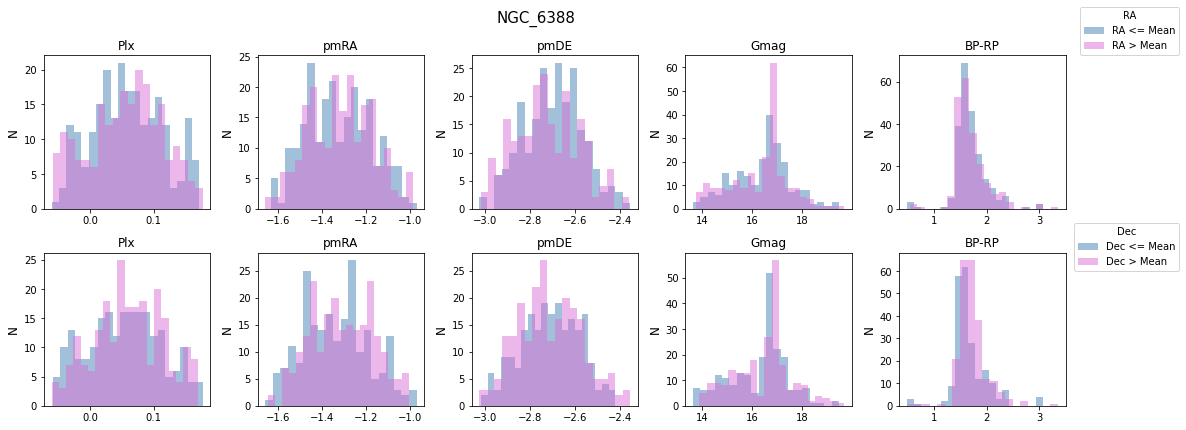

Results For NGC_6388
T-Tests for RA subsamples:
Plx: t-stat = -0.5422973147169255, p-value = 0.5878876249257052
pmRA: t-stat = 0.6560282579000344, p-value = 0.5121480644304586
pmDE: t-stat = -2.388151895801459, p-value = 0.01735324291031474
Gmag: t-stat = -0.7753528347011581, p-value = 0.4385467570979664
BP-RP: t-stat = 0.42373645692767425, p-value = 0.6719646203062336

T-Tests for Dec subsamples:
Plx: t-stat = 1.3696220928967315, p-value = 0.17150188867776867
pmRA: t-stat = 2.0207051657642405, p-value = 0.043914149755939075
pmDE: t-stat = -0.1665842449705131, p-value = 0.8677735415460994
Gmag: t-stat = 1.6703804356984246, p-value = 0.09555364461001764
BP-RP: t-stat = 1.8190537866713226, p-value = 0.06958124903984376


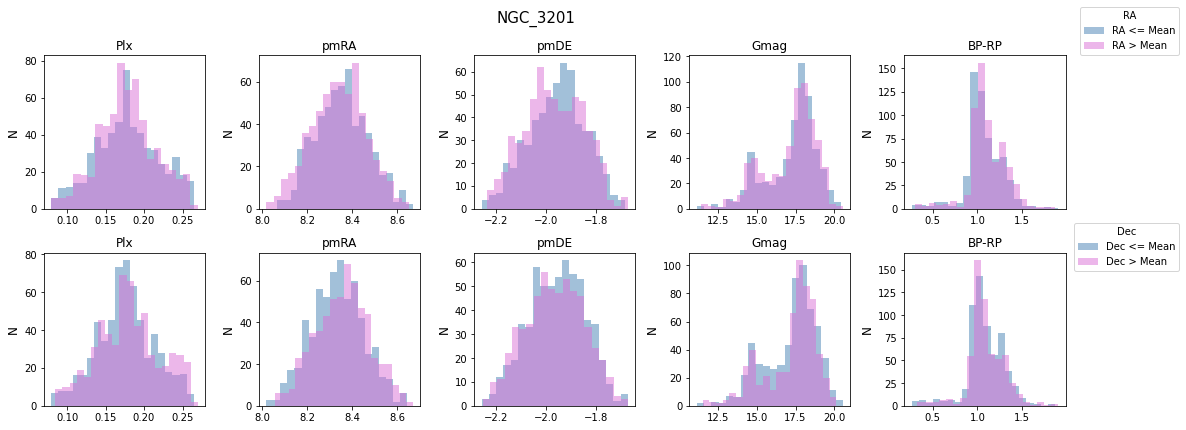

Results For NGC_3201
T-Tests for RA subsamples:
Plx: t-stat = 0.0033813753837670284, p-value = 0.9973026237167253
pmRA: t-stat = -2.2454429209371263, p-value = 0.02492238593973663
pmDE: t-stat = -1.8205197732042895, p-value = 0.06893053569227259
Gmag: t-stat = -1.1949998914008306, p-value = 0.23232477579018657
BP-RP: t-stat = 3.3886349634312642, p-value = 0.0007253647966274236

T-Tests for Dec subsamples:
Plx: t-stat = 1.8699509964182421, p-value = 0.06173558684392956
pmRA: t-stat = 3.781161854483587, p-value = 0.0001638326161121616
pmDE: t-stat = -1.2267013166694574, p-value = 0.22017711764461517
Gmag: t-stat = 0.35325214722908904, p-value = 0.7239618781201616
BP-RP: t-stat = 0.4682574264363253, p-value = 0.6396861186260268


In [12]:
# second random cluster plot
unique_cluster_names = clusters_hiprob['Name'].unique()
cluster_name = np.random.choice(unique_cluster_names)
t_test_results_ra,  t_test_results_dec = do_2b(cluster_name)

# third random cluster plot
unique_cluster_names = clusters_hiprob['Name'].unique()
cluster_name = np.random.choice(unique_cluster_names)
t_test_results_ra,  t_test_results_dec = do_2b(cluster_name)

### 2C Comment:

### 3:

Now you will analyse all the clusters in your new sample (i.e. star counts > 200, constrained in RA and
Dec standard deviation). For all these clusters, repeat the 10 t-tests carried out in task 2a and 2b. For
each parameter and coordinate (RA or Dec) being tested, plot the resulting p-values in a histogram
(so you have 10 histograms in total, each calculated from n p-values where n is the number of clusters
analysed). 


### Idea:
* We modify our code from 2, and run it on all of the clusters instead of a random cluster
* We are not going to make plots for each cluster, but we will save the p-values for each parameter
* then plot the p-values (10 histograms in total)
* in fact, we are going to modify, the existing code from 2C to make plotting for each cluster optional.

### Assumptions:
* Same as in 2



In [13]:
# 3 coding cell

unique_cluster_names = clusters_hiprob['Name'].unique()

# Initalize lists
ra_df_list = []
dec_df_list = []

# For loop over all clusters in subset
for cluster_name in unique_cluster_names:
    t_test_results_ra, t_test_results_dec = do_2b(cluster_name, plotting=False, print_output=False)

    # Add output data into pd

    ra_data = [{'Cluster': cluster_name, 'Parameter': key, 'RA_Statistic': value['statistic'], 'RA_P_Value': value['p-value']}
               for key, value in t_test_results_ra.items()]

    dec_data = [{'Cluster': cluster_name, 'Parameter': key, 'Dec_Statistic': value['statistic'], 'Dec_P_Value': value['p-value']}
                for key, value in t_test_results_dec.items()]

    ra_df_list.extend(ra_data)
    dec_df_list.extend(dec_data)

# Create separate DataFrames for RA and Dec
RA_df_results = pd.DataFrame(ra_df_list)
DEC_df_results = pd.DataFrame(dec_df_list)

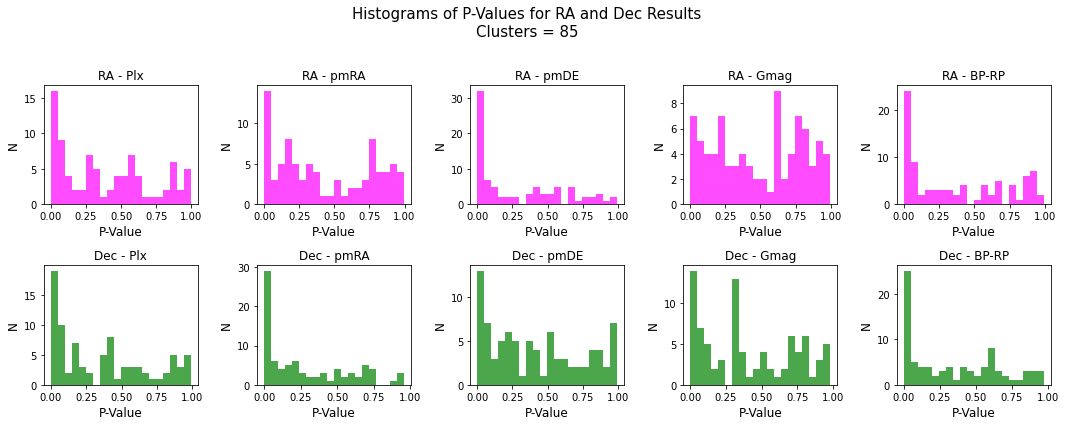

In [14]:
# 3 plotting cell

n_bins = 20 # this seems reasonable, I could do a int(sqrt(n)) rule but this looks nice

# Grab Parameters from pd
ra_parameters = RA_df_results['Parameter'].unique()
dec_parameters = DEC_df_results['Parameter'].unique()

# Initalize figure
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Plot histograms for RA results
for i, parameter in enumerate(ra_parameters):
    ax = axes[0, i]
    ax.hist(RA_df_results[RA_df_results['Parameter'] == parameter]['RA_P_Value'], bins=n_bins, color='magenta', alpha=0.7)
    ax.set_title(f'RA - {parameter}')
    ax.set_xlabel('P-Value', size=12)
    ax.set_ylabel('N', size=12)

# Plot histograms for Dec results
for i, parameter in enumerate(dec_parameters):
    ax = axes[1, i]
    ax.hist(DEC_df_results[DEC_df_results['Parameter'] == parameter]['Dec_P_Value'], bins=n_bins, color='green', alpha=0.7)
    ax.set_title(f'Dec - {parameter}')
    ax.set_xlabel('P-Value', size=12)
    ax.set_ylabel('N', size=12)

# Adjust layout, add Title
total_clusters = len(unique_cluster_names)
plt.suptitle(f'Histograms of P-Values for RA and Dec Results\nClusters = {total_clusters}', size=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


### 3 Comment

### 4: 

In a large sample of objects and different statistical tests, we always expect some outliers that appear
significant in a single test, even if the null hypothesis is true. But if the null hypothesis for a given
statistical test is actually true, the p-values from the test should be drawn from a uniform distribution
between 0 and 1. The K-S (Kolmogorov-Smirnov) test can be used to compare two distributions to see
if their CDFs are consistent. Look up this test and its scipy implementation and apply it to each of the
10 histograms obtained in Task 3 and comment on your results. Now consider what happens if you
repeat the K-S-tests but only include p-values > 0.01 in the test. Does this make a difference to which
parameters show a systematic dependence on position in the cluster? What does this tell you about
whether an effect is due to a few outliers or is present in the whole population?


### Idea:


### Assumptions

In [24]:
# Function to apply single-sample K-S test and return results
def apply_single_sample_ks_test(data, threshold=0.01):
    filtered_data = data[data > threshold]
    stat, p_value = kstest(filtered_data, 'uniform', args=(0, 1))
    return stat, p_value

# Apply single-sample K-S test to RA results
print("Single-Sample K-S Test Results for RA parameters:")
for i, parameter in enumerate(ra_parameters):
    ra_p_values = RA_df_results[RA_df_results['Parameter'] == parameter]['RA_P_Value']
    stat, p_value = apply_single_sample_ks_test(ra_p_values, threshold=0)
    print(f"{parameter}: K-S P-Value = {p_value:}")

# Apply single-sample K-S test to Dec results
print("\nSingle-Sample K-S Test Results for Dec parameters:")
for i, parameter in enumerate(dec_parameters):
    dec_p_values = DEC_df_results[DEC_df_results['Parameter'] == parameter]['Dec_P_Value']
    stat, p_value = apply_single_sample_ks_test(dec_p_values, threshold=0)
    print(f"{parameter}: K-S P-Value = {p_value:}")


############################################
print('\n')
print('Again, but only with p-values > 0.01')
print('\n')
#############################################

# Apply single-sample K-S test to RA results with p-values > 0.01
print("Single-Sample K-S Test Results for RA parameters (P-value > 0.01):")
for i, parameter in enumerate(ra_parameters):
    ra_p_values = RA_df_results[RA_df_results['Parameter'] == parameter]['RA_P_Value']
    stat, p_value = apply_single_sample_ks_test(ra_p_values, threshold=0.01)
    print(f"{parameter}: K-S P-Value = {p_value}")

# Apply single-sample K-S test to Dec results with p-values > 0.01
print("\nSingle-Sample K-S Test Results for Dec parameters (P-value > 0.01):")
for i, parameter in enumerate(dec_parameters):
    dec_p_values = DEC_df_results[DEC_df_results['Parameter'] == parameter]
    stat, p_value = apply_single_sample_ks_test(ra_p_values, threshold=0.01)
    print(f"{parameter}: K-S P-Value = {p_value}")


Single-Sample K-S Test Results for RA parameters:
Plx: K-S P-Value = 0.0006479816421020702
pmRA: K-S P-Value = 0.009607807299988662
pmDE: K-S P-Value = 1.9612282989088073e-11
Gmag: K-S P-Value = 0.5376667114880909
BP-RP: K-S P-Value = 7.359708852055603e-07

Single-Sample K-S Test Results for Dec parameters:
Plx: K-S P-Value = 1.086810267139592e-05
pmRA: K-S P-Value = 1.0133265491665592e-10
pmDE: K-S P-Value = 0.017177906273510735
Gmag: K-S P-Value = 0.0025758818271619647
BP-RP: K-S P-Value = 4.053467888669786e-06


Again, but only with p-values > 0.01


Single-Sample K-S Test Results for RA parameters (P-value > 0.01):
Plx: K-S P-Value = 0.07105630029634201
pmRA: K-S P-Value = 0.1837237740070412
pmDE: K-S P-Value = 0.0011387106637212874
Gmag: K-S P-Value = 0.5284383426851436
BP-RP: K-S P-Value = 0.050159524917066496

Single-Sample K-S Test Results for Dec parameters (P-value > 0.01):
Plx: K-S P-Value = 0.050159524917066496
pmRA: K-S P-Value = 0.050159524917066496
pmDE: K-S P-Value = 0.